# **Project Name** - **Yes bank closing stock price prediction**
 **Project Type**- Regression

 **Contribution**- Individual

# Problem Statement

The problem at hand is to develop a predictive model that can accurately forecast the closing price of Yes Bank stocks. The closing price of a stock is the final trading price recorded at the end of a trading day.

The prediction of the closing price of a stock is essential for investors, traders, and financial institutions as it helps in making informed decisions regarding buying or selling stocks. Accurate predictions can assist in optimizing investment strategies and maximizing potential returns.

# Summary and Technical Documentation

Problem Statement:

Data Collection:






Model Selection:
.

Model Training and Evaluation:
.

Model Deployment:


# Business Objective

The business objective of developing a predictive model for Yes Bank closing price prediction is to provide valuable insights and support decision-making for investors, traders, and financial institutions. Accurate forecasting of stock prices is crucial for investment decision-making, as it allows investors to make informed choices about buying or selling Yes Bank stocks. Additionally, financial institutions and traders can utilize the closing price predictions to assess and manage risks associated with Yes Bank stocks, helping them adjust trading positions and implement risk mitigation strategies

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import zipfile

In [2]:
data = pd.read_csv("/content/data_YesBank_StockPrices.csv")
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


Exploratory Data Analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [4]:
data.shape

(185, 5)

Handling Null Values


In [5]:
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [9]:
numerical_col = data.describe().columns



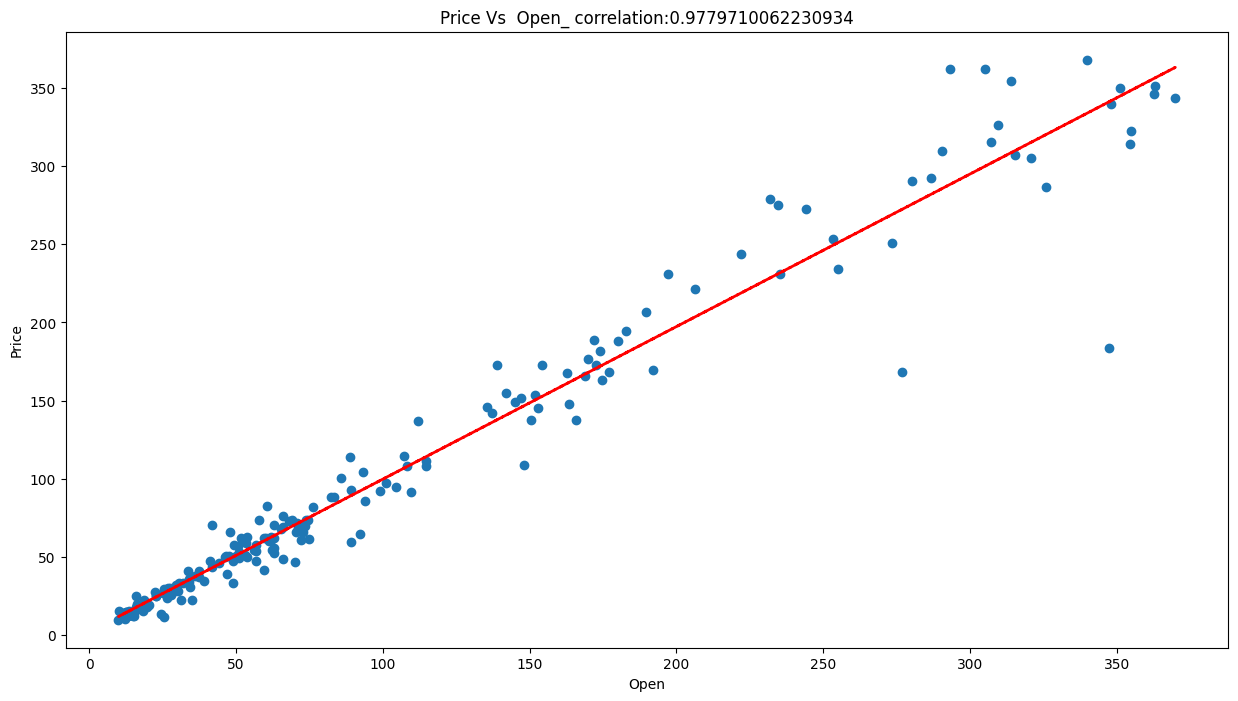

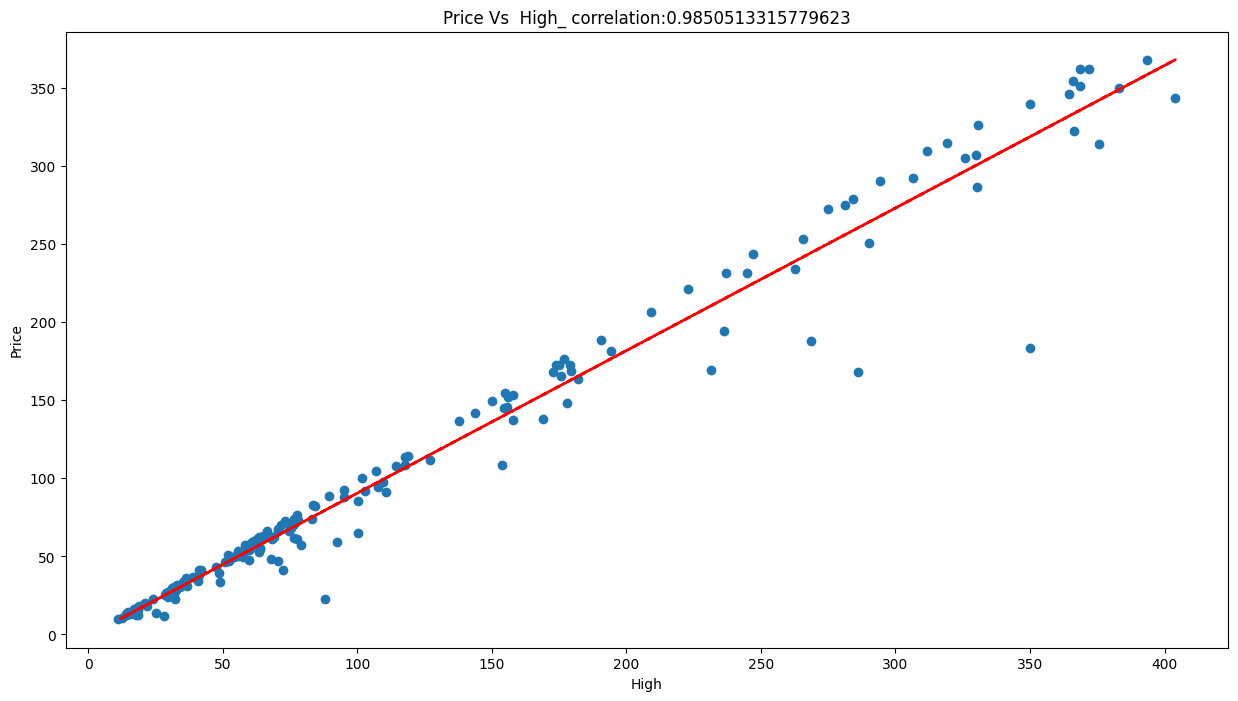

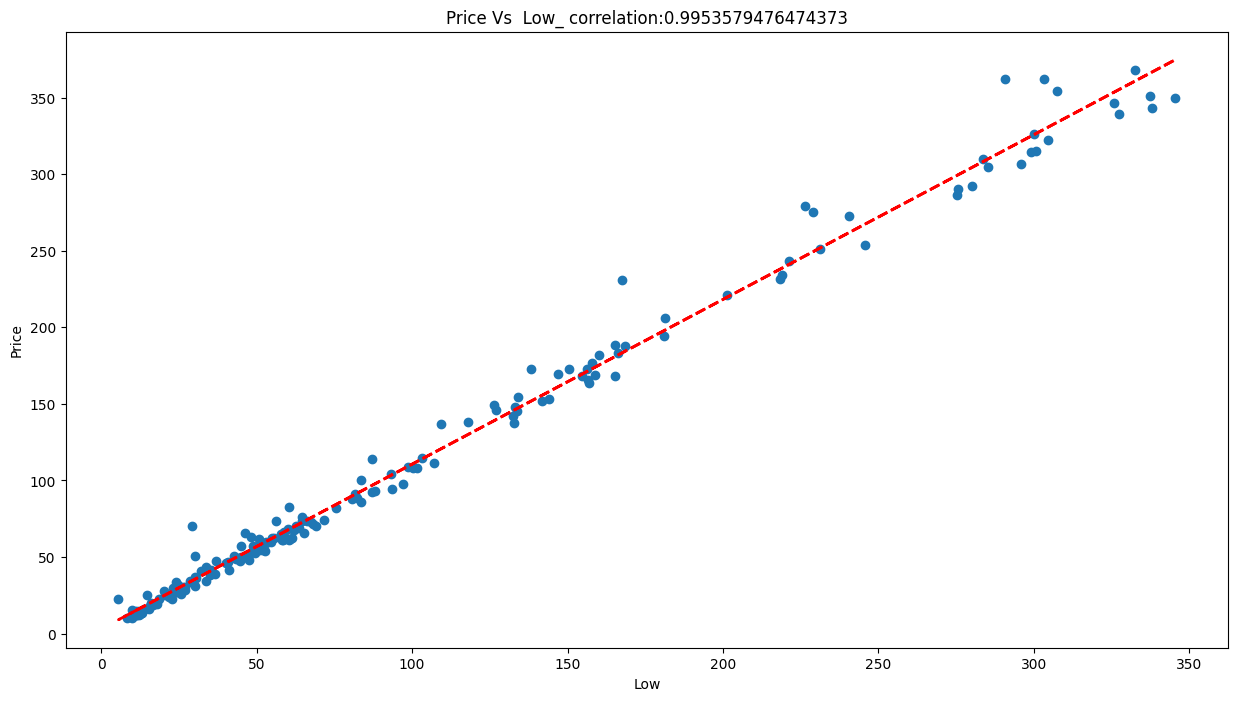

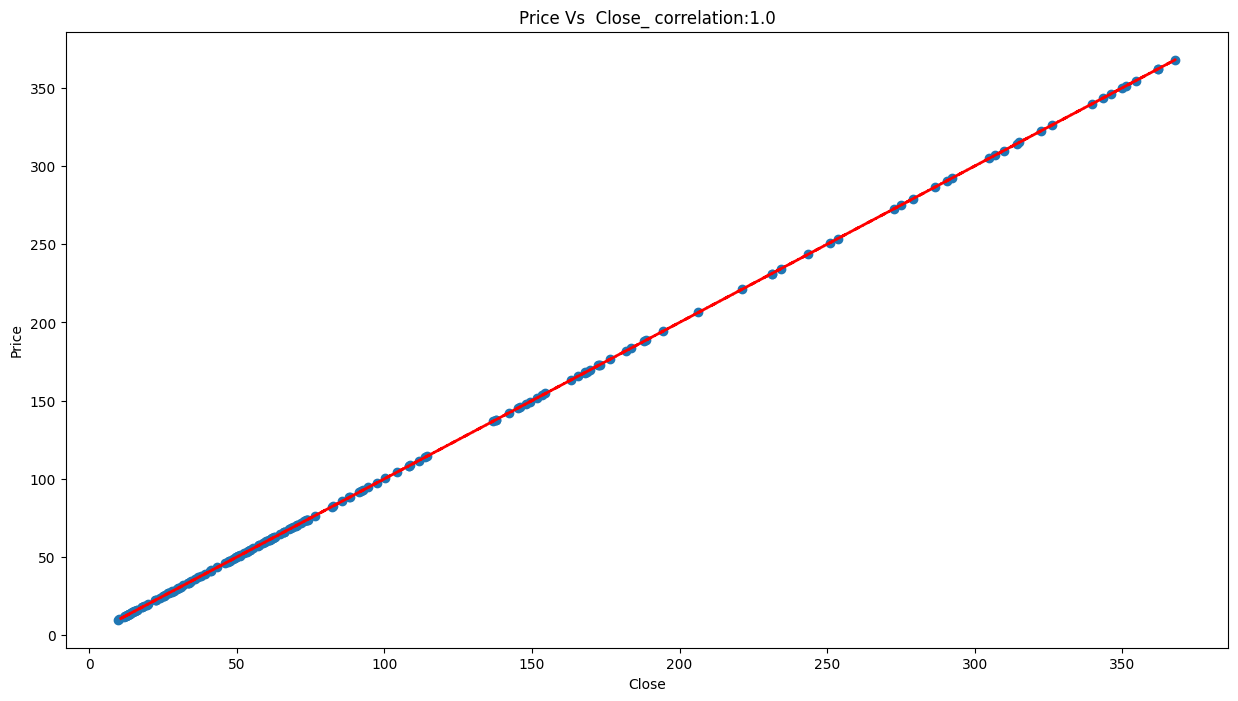

In [11]:
for col in numerical_col[:]:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = data[col]
  label = data['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(data[col],data['Close'],1)
  y_hat = np.poly1d(z)(data[col])
  plt.plot(data[col] , y_hat, "r--",lw = 2)
plt.show()

<ipython-input-12-47cc566b64f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'],color='red')


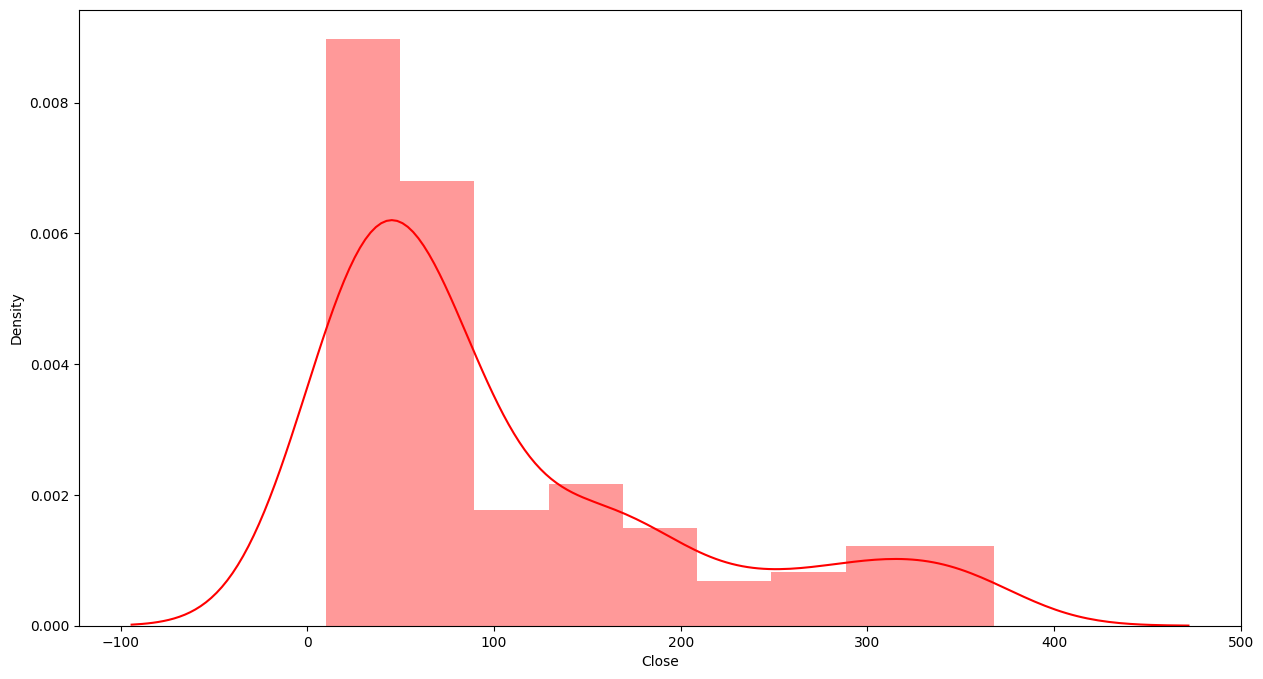

In [12]:
plt.figure(figsize=(15,8))
sns.distplot(data['Close'],color='red')
plt.show()

<ipython-input-14-fb7752b56460>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

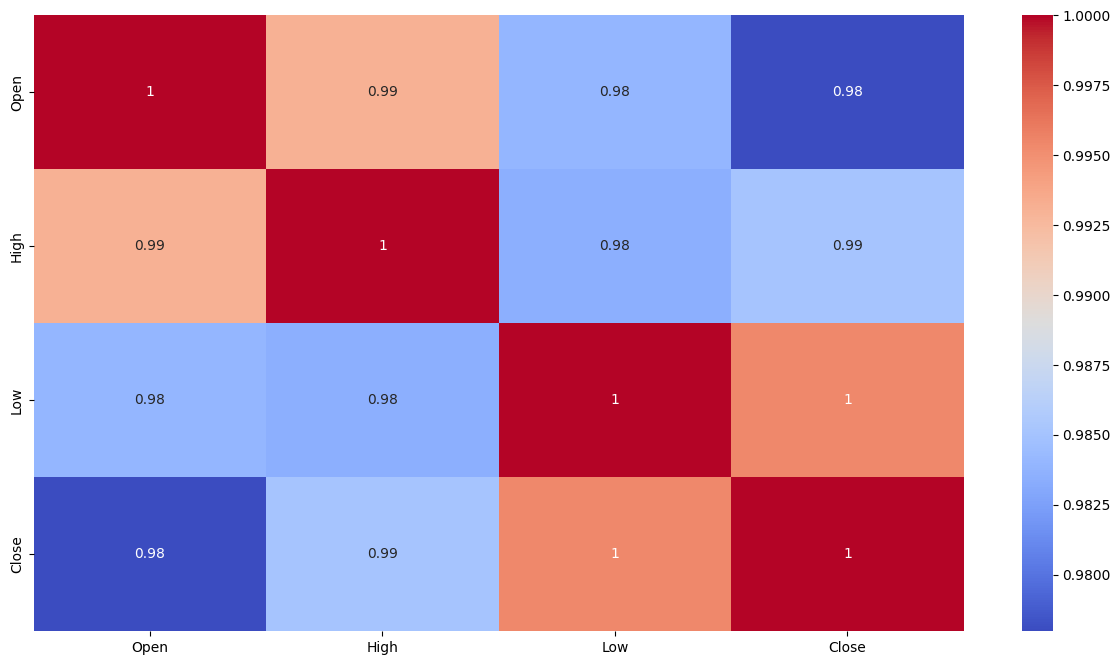

In [ ]:
corr = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

Model Deployment

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from numpy import math
import warnings

In [ ]:
X = data.drop(columns=['Close','Date']).apply(zscore)
Y = np.log10(data['Close'])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state = 1)

In [ ]:
reg = LinearRegression()
reg_model = reg.fit(X_train,Y_train)

In [ ]:
reg.score(X_train,Y_train)

0.8146653424416905

In [ ]:
Y_test_pred = reg.predict(X_test)
Y_train_pred = reg.predict(X_train)

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(Y_test, Y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(Y_test, Y_test_pred)))
print("MAE :",mean_absolute_error(Y_test, Y_test_pred))
print("R2 :",r2_score(Y_test, Y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [ ]:
# Train Performance
print("MSE :",mean_squared_error(Y_train, Y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(Y_train, Y_train_pred)))
print("MAE :",mean_absolute_error(Y_train, Y_train_pred))
print("R2 :",r2_score(Y_train, Y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


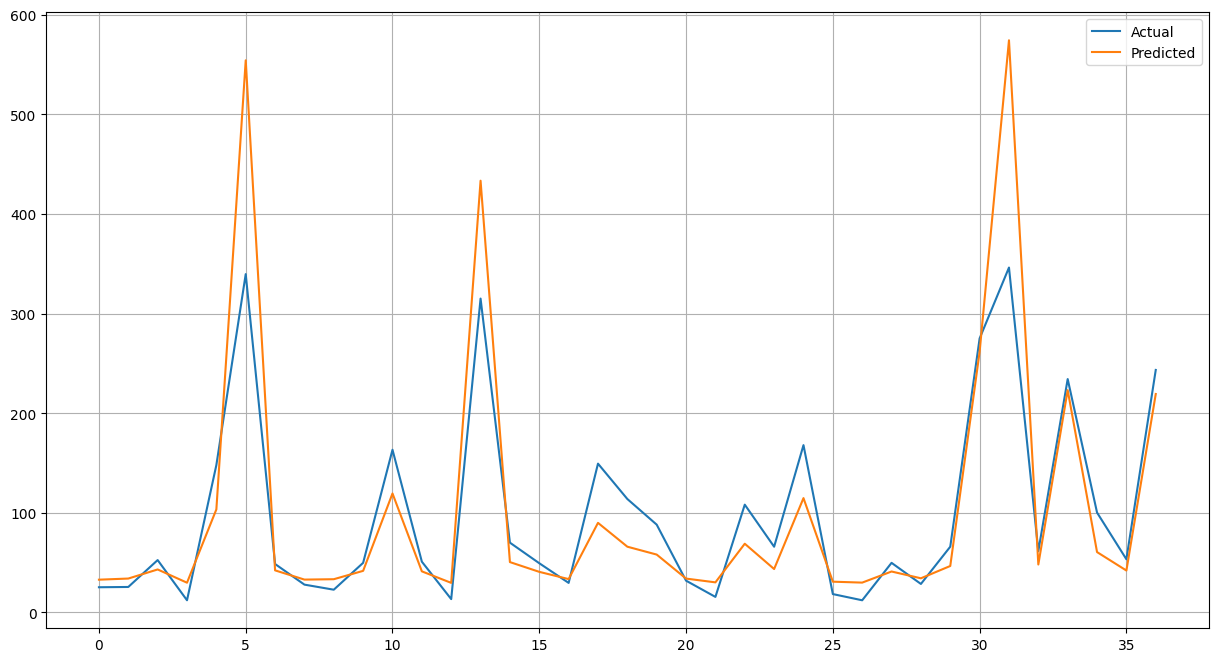

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(Y_test)))
plt.plot(10**(Y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
regressor.score(X_train,Y_train)

0.9977741769223983

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(Y_test, Y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(Y_test, Y_test_pred)))
print("MAE :",mean_absolute_error(Y_test, Y_test_pred))
print("R2 :",r2_score(Y_test, Y_test_pred))

MSE : 0.03158251893048738
RMSE : 0.17771471219481907
MAE : 0.15128511034606282
R2 : 0.8225699915389754


In [ ]:
# Train Performance
print("MSE :",mean_squared_error(Y_train, Y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(Y_train, Y_train_pred)))
print("MAE :",mean_absolute_error(Y_train, Y_train_pred))
print("R2 :",r2_score(Y_train, Y_train_pred))

MSE : 0.033659395765946676
RMSE : 0.18346497149577812
MAE : 0.1559169766820056
R2 : 0.8146653424416905


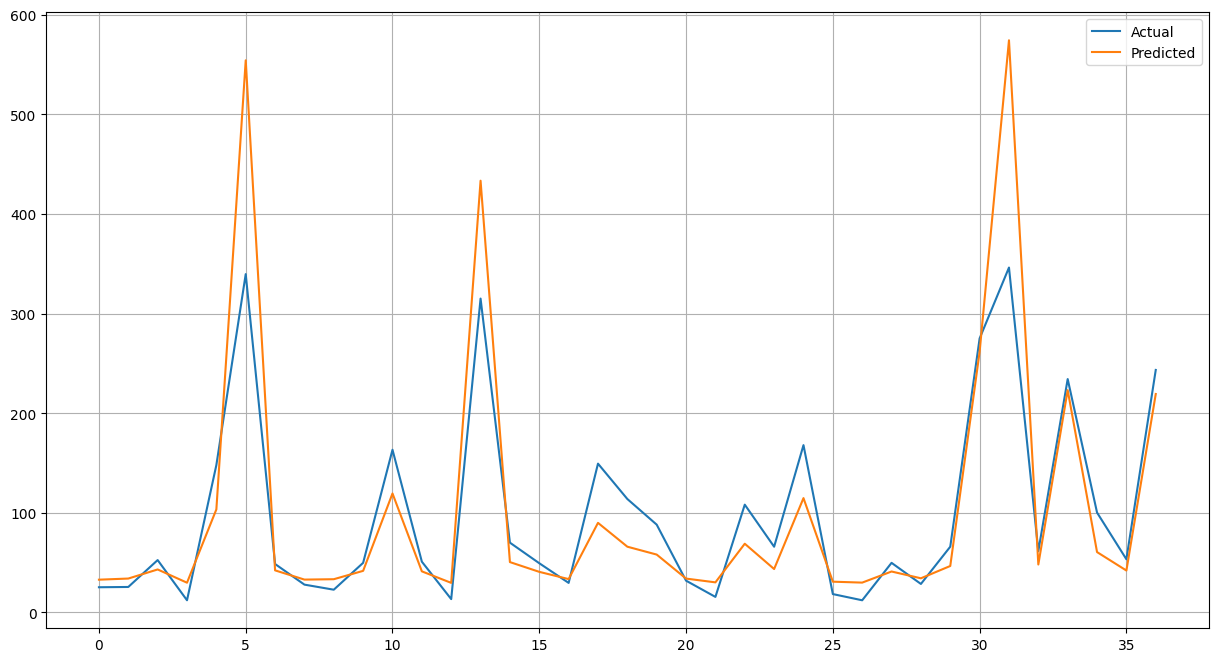

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(Y_test)))
plt.plot(10**(Y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

# Conclusion

In conclusion, the Yes Bank closing price prediction project aims to develop a predictive model that can accurately forecast the closing prices of Yes Bank stocks. By leveraging historical data, relevant features, and advanced machine learning techniques, the project seeks to provide valuable insights for investment decision-making, risk management, and portfolio optimization strategies.